# Prediction using Supervised Machine Learning

1. Predict the percentage of an student based on the no. of study hours.
2. What will be predicted score if a student studies for 9.25 hrs/ day?

###### Importing needed packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###### Reading data

In [25]:
link='http://bit.ly/w-data'
data=pd.read_csv(link)

### Data exploration

In [3]:
#take a look at the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#data summarization
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


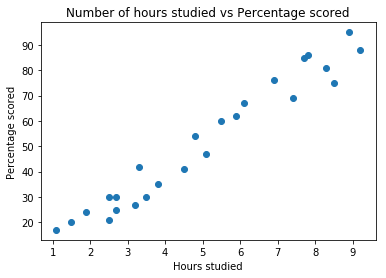

In [9]:
#plotting the distribution of data through scatter plot
plt.scatter(data.Hours,data.Scores)
plt.title('Number of hours studied vs Percentage scored')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

From the above graph, it is clear that there is a positive linear relationship between numbers of hours studied and percentage scored

### Data preparation

In [10]:
#divide dataset into attributes and labels
X=data.iloc[:, :-1].values  
y=data.iloc[:, 1].values  

In [11]:
#split the data into training and test set using Scikit-Learn's train_test_split()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Training the algorithm

In [12]:
#training of algorithm takes place
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###### Plot output

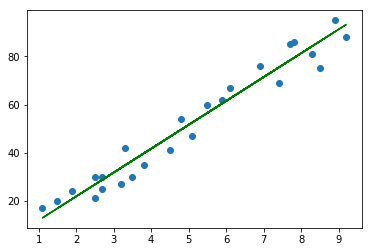

In [22]:
# regression line 
yhat=model.coef_*X + model.intercept_

# ploting regression line on scatter plot
plt.scatter(X,y)
plt.plot(X,yhat,color='g')
plt.show()

### Prediction

In [23]:
y_pred=model.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
hours = 9.25
new_pred = model.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

Mean absolute error: It is the mean of the absolute value of the errors.

In [ ]:
from sklearn import metrics
error=metrics.mean_absolute_error(y_pred,y_test)
print("Error=",error)